In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [279]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['label']=iris.target
iris_data.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


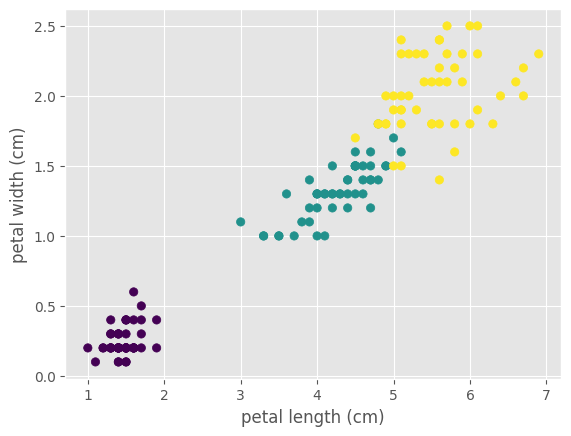

In [280]:
plt.style.use('ggplot')
plt.scatter(iris_data.iloc[:,2], iris_data.iloc[:,3], c=iris.target)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [281]:
# Dataset where x is the attributes and y the result
x = iris_data.iloc[:,0:4]
y = iris_data.iloc[:,4]

### KNN
KNN is a simple yet effective algorithm for pattern recognition and can be applied to both classification and regression problems. However, its performance can vary based on the dataset characteristics and the choice of K and distance metric, and it is more suitable for small to medium-sized datasets.

In [282]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [283]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
# split data for traing and test
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=88,
                                                    test_size=0.2, train_size=0.8,
                                                    shuffle=True, stratify=y)

knn.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [284]:
x_N = np.array([
    [5.6, 3.4, 1.4, 0.1],
    [7.5, 4, 5.5, 2]
])

target_names = list(iris.target_names)

knn_prediction = knn.predict(X_test)
result = [(target_names[p], p) for p in knn_prediction]

In [285]:
metrics.accuracy_score(y_test, knn_prediction)

0.9666666666666667

### Decision Tree
A decision tree is a popular machine learning algorithm used for both classification and regression tasks. It is a flowchart-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents the outcome or prediction.

In [286]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

In [287]:
result = [(target_names[p], p) for p in dt_prediction]

In [288]:
metrics.accuracy_score(y_test, dt_prediction)

1.0

In [289]:
# Cross Validation
cv_score = cross_val_score(dt, X=x, y=y, cv=15)
cv_score

array([1. , 1. , 0.9, 1. , 1. , 1. , 0.8, 1. , 0.9, 0.8, 1. , 1. , 1. ,
       1. , 1. ])

### Naive Bayes

Bayes' theorem is a formula that calculates the probability of an event based on prior knowledge or evidence. It states that the probability of an event A happening, given that event B has occurred, is equal to the probability of B given A multiplied by the probability of A, divided by the probability of B.


In [290]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_prediction = nb.predict(X_test)

metrics.accuracy_score(y_test, nb_prediction)

0.9666666666666667

### Logistic Regression
Logistic regression is a statistical model used for binary classification tasks, where the goal is to predict the probability of an event belonging to one of two possible outcomes or classes. Despite its name, logistic regression is a classification algorithm rather than a regression algorithm.

In [291]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

breast_cancer_data = load_breast_cancer()

bc_data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
bc_data['label']=breast_cancer_data.target

X_c = breast_cancer_data.data
y_c = breast_cancer_data.target

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_c, y_c, random_state=88,
                                                    test_size=0.3, train_size=0.7)


In [292]:
lr = LogisticRegression()
lr.fit(Xc_train, yc_train)
lr_prediction = lr.predict(Xc_test)

metrics.accuracy_score(yc_test, lr_prediction)

/home/hctr/code/pyenvs/data_science/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9532163742690059

### Evaluation Metrics

In [296]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
conf_mat = confusion_matrix(yc_test, lr_prediction)
clss_report = classification_report(yc_test, lr_prediction)

In [297]:
print(conf_mat)
print(clss_report)

[[ 54   3]
 [  5 109]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        57
           1       0.97      0.96      0.96       114

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



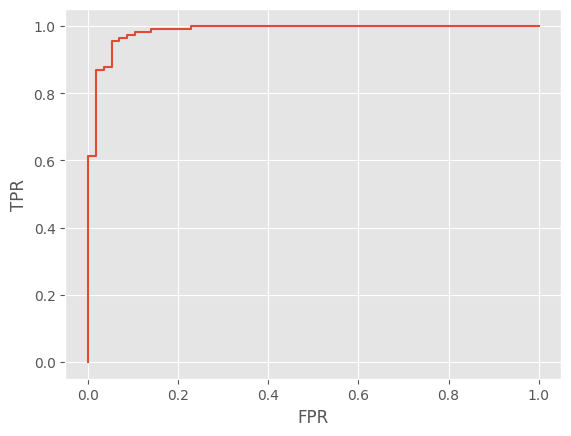

In [298]:
y_prob = lr.predict_proba(Xc_test)[:,1]
fpr, tpr, th = roc_curve(yc_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [299]:
roc_auc_score(yc_test, y_prob)

0.9855340104647583